# Graphviz and Python
*Nodes and Edges and Graphs Oh My*

Not this kind of graph ...

![Image](notThatKindOfGraph.svg)

This kind of graph ...

![Image](example1.svg)

graphviz is package of command line programs that allow diagrams to be specified in code and then saved in a number of different formats (.svg, .png, .jpeg, and many more.)

A typical graphviz command:

`dot -Tsvg example1.dot > example1.svg`

Note: `dot` is one of a number of programs that Graphviz refers to as filters.  Filters use different strategies for positioning elements of the graphs.  DOT is also the language used to define

So what's in a .dot file?
    
```dot
digraph example1{  // directed graph
    rankdir="LR";  // set attribute of graph
    A -> B -> C;   // 3 nodes and the edges between
}
```

![example1](example1.svg)


```dot
graph example2 {
  rankdir="LR";
  label="Title of digraph";

  // define a node w/ attributes
  "node 1" [fillcolor="lightgreen"; style="filled"];

  // define another node w/ attributes
  B [label="node 2"];

  // un-directed edge with attributes
  "node 1" -- B [label="directionality\nis overrated"];
}
```

![example2](example2.svg)

```dot
digraph example3{
  rankdir="LR";
  label="example3";
  subgraph rectangular_nodes {
    node [shape="rectangle"];
    A;
  };
  subgraph cluster_1{
    label="cluster 1";
    B;
  }
  A -> B;
}
```

![example3](example3.svg)

So let's use a Python library to generate the DOT code

![stack1](stack1.svg)

To install the graphviz library.  

`pip install graphviz`

Make sure the `dot` program is on your `PATH`

In [2]:
from graphviz import Digraph

graph = Digraph('graphviz1', comment='Graph Label')
graph.node('A', "Node1")
graph.node('B', "Node2")
graph.node('C', "Node3")
graph.node('D', 'Node4')
graph.edges(['AB', 'BC'])
graph.edge('C', 'D')

In [3]:
print(graph.source)

// Graph Label
digraph graphviz1 {
	A [label=Node1]
	B [label=Node2]
	C [label=Node3]
	D [label=Node4]
	A -> B
	B -> C
	C -> D
}



In [4]:
# Outputs graph to current directory.  2 Files are created
# a .gv file with the DOT definition of the graph
# a .gv.pdf with the PDF version
graph.render()

'graphviz1.gv.pdf'

In [5]:
# specify directory to write file to using directory argument
graph.render(directory='output')

'output/graphviz1.gv.pdf'

In [6]:
# A different output format can be specified when graph is created
graph2 = Digraph('graphviz2', format='svg')

# or at any point
graph.format = 'svg'
graph.directory = '.'
graph.render()

'graphviz1.gv.svg'

![graphviz1](graphviz1.gv.svg)

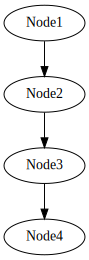

In [7]:
# Hey look graphs automatically display in Jupyter (when using svg format)
graph

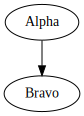

In [33]:
node_name_vs_label = Digraph('Node Name vs. Label', format='svg')
node_name_vs_label.node('A', 'Alpha')
node_name_vs_label.node('B', 'Bravo')
node_name_vs_label.edge('A', 'B')
node_name_vs_label

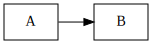

In [8]:
graph3 = Digraph(
    'graphviz3',
    format='svg',
    node_attr={'shape': 'rectangle'},
    graph_attr={'rankdir': 'LR'}
)
graph3.node('A')
graph3.node('B')
graph3.edge('A', 'B')
graph3

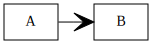

In [9]:
# You can change node, graph, and edge attributes as you build the graph
graph3.edge_attr.update(arrowhead='vee', arrowsize='2')
graph3

In [10]:
print(graph3.source)

digraph graphviz3 {
	graph [rankdir=LR]
	node [shape=rectangle]
	edge [arrowhead=vee arrowsize=2]
	A
	B
	A -> B
}



In [25]:
graph4 = Digraph('graphviz4', format='svg')
graph4.attr('node', shape='oval')
print(graph4.source)

graph5 = Digraph('graphviz5', format='svg')
graph5.attr(rankdir='LR')
print(f"\n{graph5}")

digraph graphviz4 {
	node [shape=oval]
}


digraph graphviz5 {
	rankdir=LR
}



In [ ]:
def build_digraph(num, graph_attr=None):
    default_graph_attr = {'rankdir': 'LR'}
    if graph_attr:
        default_graph_attr.update(graph_attr)
    return Digraph(
        f'graphviz{num}',
        format='svg',
        graph_attr=default_graph_attr,
    )

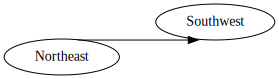

In [26]:
graph6 = build_digraph(6, graph_attr={'splines': 'false'})
graph6.edge('Northeast:ne', 'Southwest:sw')
graph6

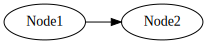

In [28]:
graph7 = build_digraph(7, graph_attr={'splines': 'false'})
graph7.edge('Node1:c', 'Node2:_')
graph7

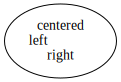

In [29]:
graph8 = build_digraph(8)
graph8.node('A', 'centered\nleft\lright\r')
graph8

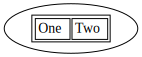

In [35]:
graph9 = build_digraph(9)
graph9.node('B', '<<table><tr><td>One</td><td>Two</td></tr></table>>')
graph9

## Resources

* [graphviz.org](https://graphviz.org/)
* [graphviz (Python Library)](https://graphviz.readthedocs.io/en/stable/)